<a href="https://colab.research.google.com/github/NHYT123/colab_lab2/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('/content/sample_data/mba.csv')

# Проверим информацию о данных
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Преобразуем категориальные столбцы в числовые
categorical_columns = ['Gender', 'Has Management Experience', 'MBA Funding Source', 'Desired Post-MBA Role',
                       'Location Preference (Post-MBA)', 'Reason for MBA', 'Online vs. On-Campus MBA']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Целевая переменная
y = df['Decided to Pursue MBA?']

# Признаки
X = df.drop('Decided to Pursue MBA?', axis=1)

# Проверим типы данных после кодирования
print(X.dtypes)


Person ID                           int64
Age                                 int64
Gender                              int64
Undergraduate Major                object
Undergraduate GPA                 float64
Years of Work Experience            int64
Current Job Title                  object
Annual Salary (Before MBA)          int64
Has Management Experience           int64
GRE/GMAT Score                      int64
Undergrad University Ranking        int64
Entrepreneurial Interest          float64
Networking Importance             float64
MBA Funding Source                  int64
Desired Post-MBA Role               int64
Expected Post-MBA Salary            int64
Location Preference (Post-MBA)      int64
Reason for MBA                      int64
Online vs. On-Campus MBA            int64
dtype: object


In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Проверим размерности выборок
print(X_train.shape, X_test.shape)


(6000, 19) (4000, 19)


In [ ]:
# Заменяем 'No' в столбце "Age" на медиану
X_train['Age'] = X_train['Age'].replace('No', '')

# Удаляем строки с пропущенными значениями
X_cleaned = X_train.dropna()

# Преобразуем категориальные переменные в числовые
X_train['Gender'] = X_train['Gender'].replace({1: 'Male', 0: 'Female', 2: 'Other'})

# Применяем one-hot encoding к столбцу "Undergraduate Major"
X_train = pd.get_dummies(X_train, columns=['Undergraduate Major'])

# Если необходимо, можно преобразовать данные в числовой формат
X_train['Undergraduate GPA'] = pd.to_numeric(X_train['Undergraduate GPA'], errors='coerce')
X_test['Undergraduate GPA'] = pd.to_numeric(X_test['Undergraduate GPA'], errors='coerce')

# Применяем one-hot encoding для категориальных признаков
X_train = pd.get_dummies(X_train, drop_first=True)

# Преобразуем числовые столбцы в формат float
X_train = X_train.astype(float)

# Убедимся, что в данных нет строковых значений
X_train = X_train.apply(pd.to_numeric, errors='coerce')

X_train = X_train.drop(columns=['Current Job Title'])

X_train = X_train.select_dtypes(include=['number']).apply(pd.to_numeric, errors='coerce')

# Удаляем строки с NaN значениями
X_train = X_train.dropna()
y_train = y_train.dropna()


In [ ]:
# Заменяем 'No' в столбце "Age" на пустоту
X_test['Age'] = X_test['Age'].replace('No', '')

# Удаляем строки с пропущенными значениями
X_cleaned = X_test.dropna()

# Преобразуем категориальные переменные в числовые
X_test['Gender'] = X_test['Gender'].replace({1: 'Male', 0: 'Female', 2: 'Other'})

# Применяем one-hot encoding к столбцу "Undergraduate Major"
X_test = pd.get_dummies(X_test, columns=['Undergraduate Major'])

# Если необходимо, можно преобразовать данные в числовой формат
X_test['Undergraduate GPA'] = pd.to_numeric(X_test['Undergraduate GPA'], errors='coerce')

# Применяем one-hot encoding для категориальных признаков
X_test = pd.get_dummies(X_test, drop_first=True)

# Преобразуем числовые столбцы в формат float
X_test = X_test.astype(float)

# Убедимся, что в данных нет строковых значений
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_test = X_test.drop(columns=['Current Job Title'])

X_test = X_test.select_dtypes(include=['number']).apply(pd.to_numeric, errors='coerce')

# Удаляем строки с NaN значениями
X_test = X_test.dropna()
y_test = y_test.dropna()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Инициализация модели логистической регрессии
logreg = LogisticRegression(max_iter=1000)

# Обучение модели на тренировочных данных
logreg.fit(X_train, y_train)

# Оценка качества модели на тренировочных данных
train_score = logreg.score(X_train, y_train)
print(f'Training accuracy: {train_score:.4f}')


Training accuracy: 0.5857


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Прогноз на тестовых данных
y_pred = logreg.predict(X_test)

# Оценка качества модели на тестовых данных
test_score = logreg.score(X_test, y_test)
print(f'Test accuracy: {test_score:.4f}')



Test accuracy: 0.5982


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# ROC-AUC
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # вероятности положительного класса
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.4f}')


Confusion Matrix:
[[   0 1607]
 [   0 2393]]
ROC-AUC: 0.4965


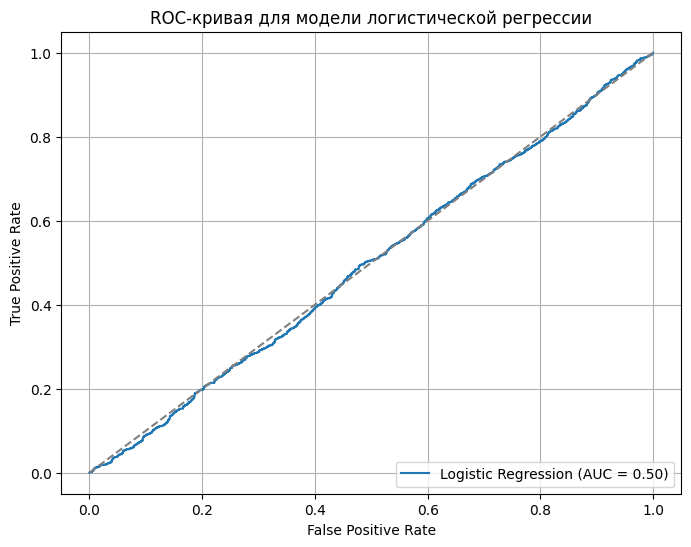

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Кодируем метки 'No' и 'Yes' в 0 и 1
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Для бинарной классификации y_pred_proba - вероятности для класса 'Yes'
y_pred_proba_encoded = y_pred_proba  # Если y_pred_proba одномерный, то это уже нужные вероятности

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba_encoded)

# Вычисление AUC
roc_auc = np.trapz(tpr, fpr)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # линия случайного классификатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для модели логистической регрессии')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
